Task 2a (1p): Provide a similar analysis (for 2 datasets) using the igraph library. The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank)

In [25]:
import igraph as ig
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Loading congress twitter data

In [26]:
congress = pd.read_csv(
    'email-Eu-core.txt.gz',
    delimiter=' ',
    names=['source', 'target'],
    usecols=[0, 1]  # specify the columns to read
)
congress

,source,target
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7
...,...,...
25566,420,143
25567,174,859
25568,440,460
25569,52,786


In [27]:
G_ig = ig.Graph.TupleList(congress.itertuples(index=False), directed=True)
G_ig

## Visualizing the network

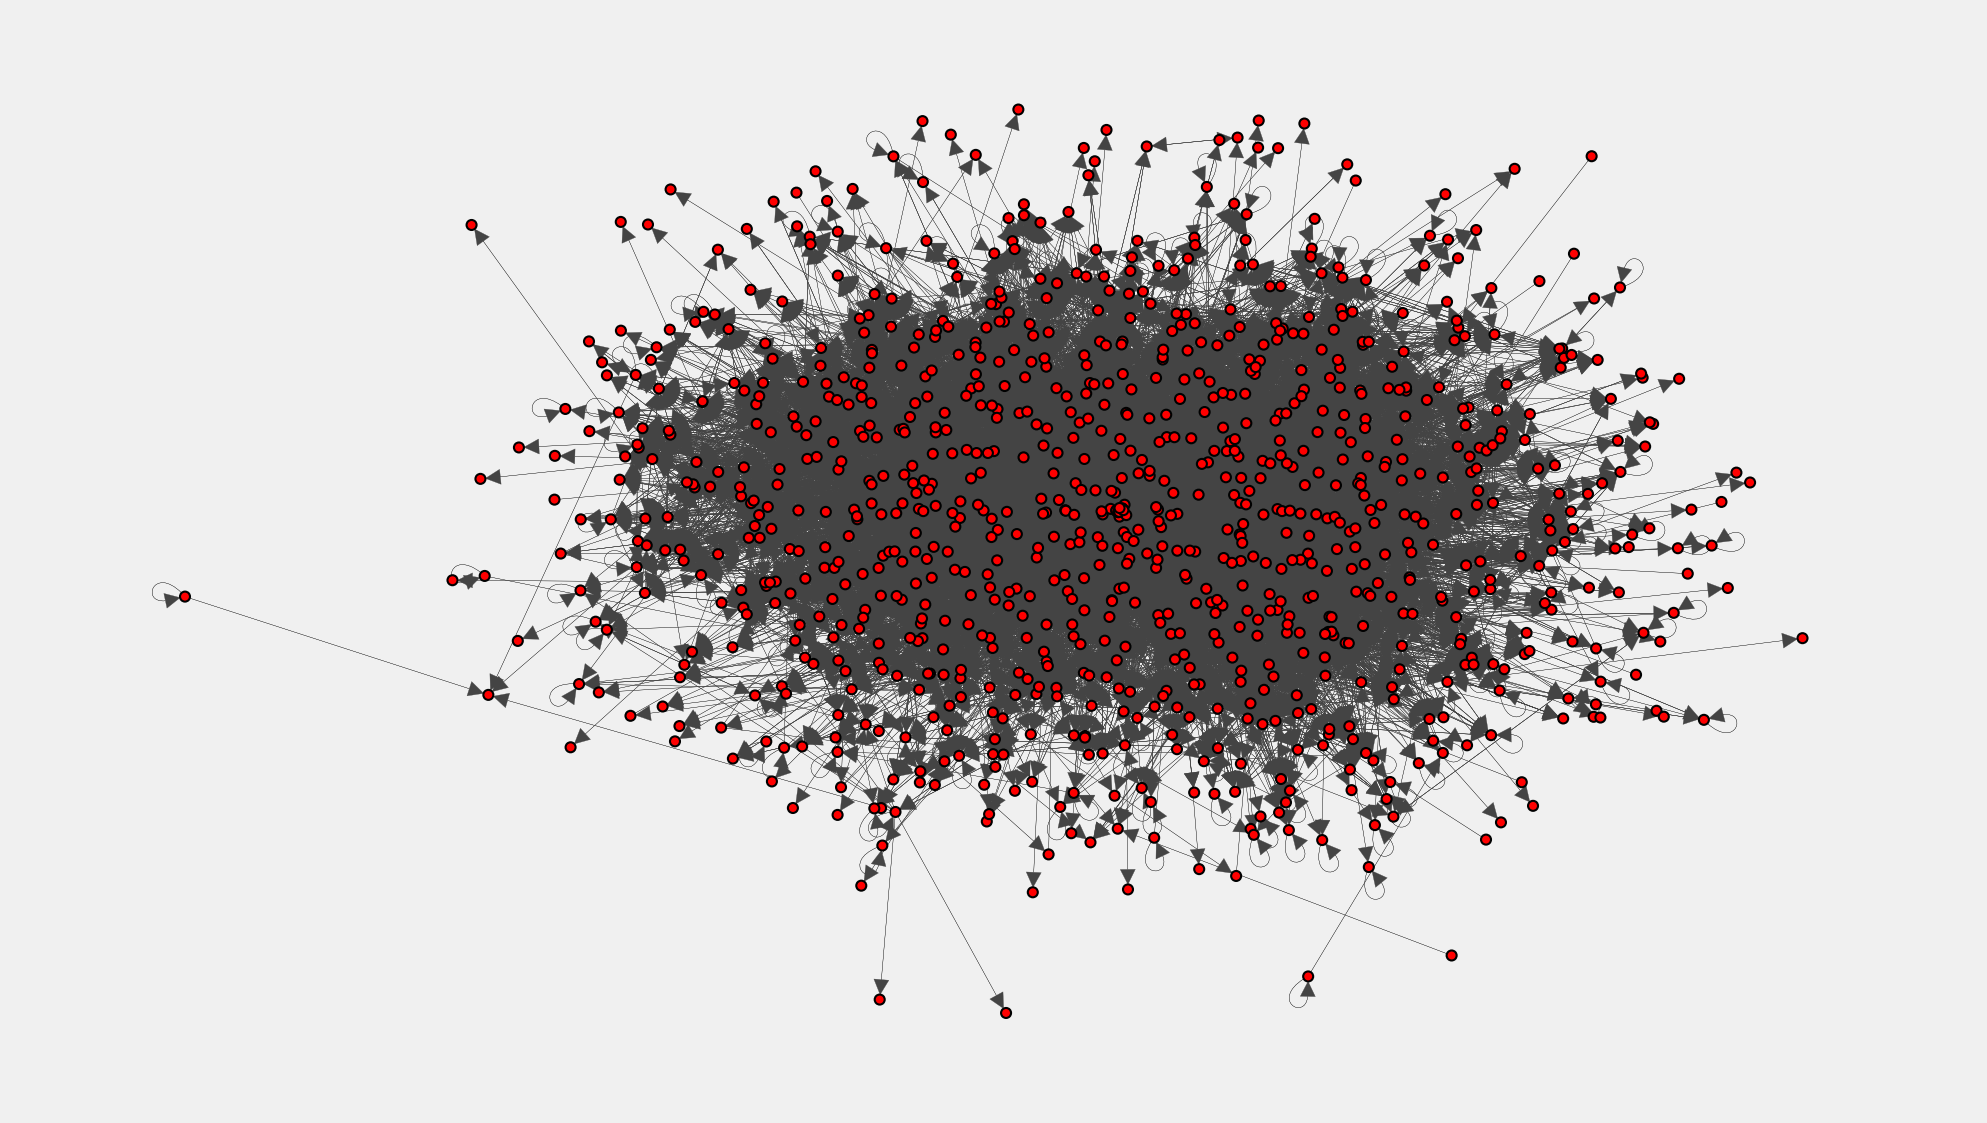

In [28]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"vertex_size": 10, "vertex_label": None, "edge_width": 0.15}
ig.plot(G_ig, layout=G_ig.layout("kk"), target=ax, **plot_options)

## Basic statistics

In [29]:
# number of nodes
G_ig.vcount()

1005

In [30]:
G_ig.ecount()

25571

In [31]:
degrees = G_ig.degree()

### degree distribution

In [32]:
print(f"""
Mean degree: {np.mean(degrees)}
Median degree: {np.median(degrees)}
Max degree: {np.max(degrees)}
Min degree: {np.min(degrees)}
""")


Mean degree: 50.88756218905473
Median degree: 32.0
Max degree: 546
Min degree: 1



In [33]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.dpi']= 150

v_degree = G_ig.degree()
v_betweenness = G_ig.betweenness()
v_pagerank = G_ig.pagerank()

Correlation

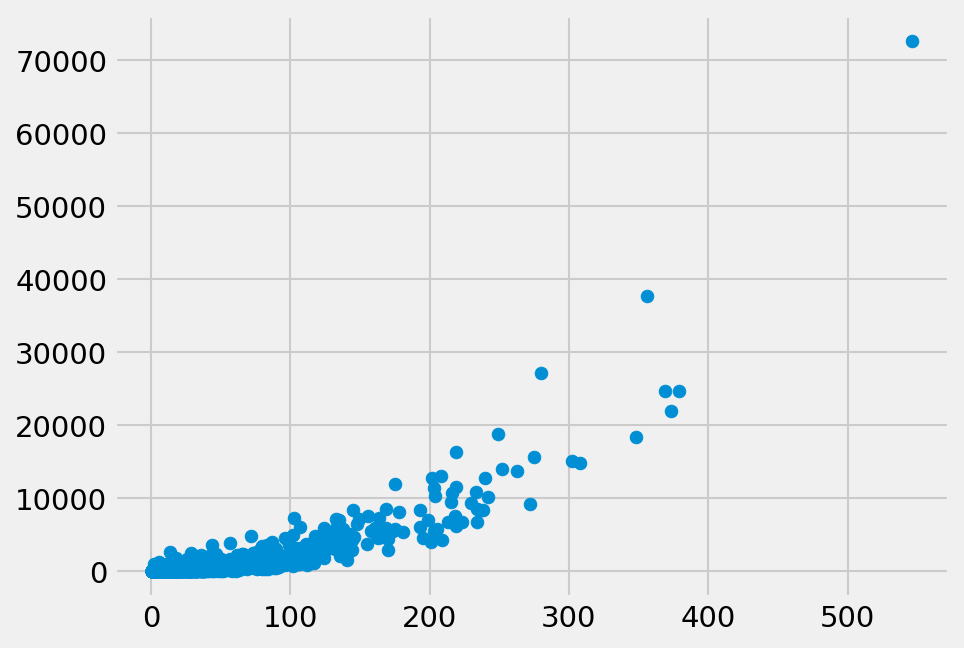

In [34]:
# correlation
plt.scatter(v_degree, v_betweenness)

## Shortest-paths analysis

In [35]:
shortest_path_lengths = G_ig.distances()
shortest_path_lengths[0][37]

3

In [36]:
diameter = G_ig.diameter()
diameter

7

## Analysis of two or more centrality measures

### Betweenness Centrality

In [43]:
G_ig.betweenness()[:10]

[1548.7327117725831,
 0.0,
 5850.702548861043,
 1536.6856003944515,
 5232.020213445737,
 27174.02169102858,
 12722.776976944997,
 2976.675176088062,
 755.45847187551,
 480.9143252228849]

In [40]:
## Find out edge of highest cenrality
ebs = G_ig.edge_betweenness()
max_eb = max(ebs)
[G_ig.es[idx].tuple for idx, eb in enumerate(ebs) if eb == max_eb]

[(443, 414)]

### Page rank

In [44]:
G_ig.pagerank()[:10]

[0.0012719971449497486,
 0.009981137114353692,
 0.002089116925059593,
 0.0017181700699094309,
 0.002428685975559186,
 0.004512903844400384,
 0.0029104416865213846,
 0.0019407366229231692,
 0.0012330559169045463,
 0.0012090759700616306]

In [46]:
ebs = G_ig.pagerank()
max_eb = max(ebs)
[G_ig.es[idx].tuple for idx, eb in enumerate(ebs) if eb == max_eb]

[(2, 3)]